# Programowanie w Językach Skryptowych (Laboratorium 3)

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum (zamień zmienne `imie` oraz `nazwisko` na odpowiednie wartości):

```
+-- 📂 [imie].[naziwsko].zip
    +-- 📜 Laboratorium 3 - programowanie obiektowe.ipynb
    +-- 📜 [wszelkie dodatkowe pliki]
```


### Zadanie 1

Grafy w komputerze reprezentujemy najczęściej przy pomocy list sąsiedztwa. Utwórz odpowiednie klasy do reprezentacji grafu oraz realizacji algorytmu BFS.

Poniższy obrazek (część z prawej strony) pokazuje taką reprezentację (w górnej części - graf nieskierowany, w dolnej części - graf skierowany).
Możesz skorzystać z wykładu z algorytmów i struktur danych  https://youtu.be/L4D3fo5qAAY

<div style='border: 1px dashed; width: 50%; margin: auto; margin-top: 10px;'>
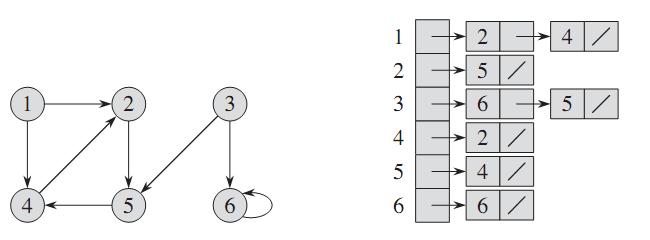

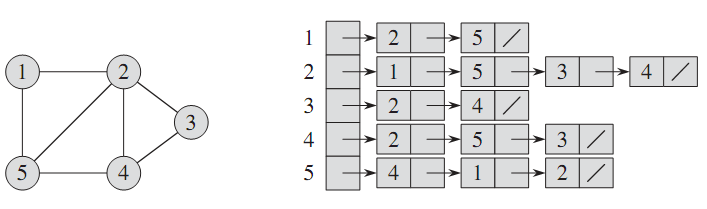
    
</div>



In [121]:
import networkx as nx
import matplotlib.pyplot as plt

class Vertex:
    def __init__(self, name, edges):
        self.name = name
        self.edges = edges
        self.color = 'white'
    def __eq__(self, other):
        return self.name == other.name
    def __contains__(self, vertex):
        return vertex.name in self.edges
    def __str__(self):
        color = f' color {self.color}' if hasattr(self, 'color') else ''
        distance = f' distance {self.distance}' if hasattr(self, 'distance') else ''
        return f'vertex \'{self.name}\' with edges {self.edges}{color}{distance}'

class Graph:
    def __init__(self, vertices):
        self.vertices = vertices
    def __getitem__(self, name):
        for vertex in self.vertices:
            if vertex.name == name:
                return vertex
        raise KeyError(f'vertex \'{name}\' not found')
    def draw(self):
        graph_network = nx.Graph()
        nodes = {'white': [], 'gray': [], 'black': []}
        [nodes[vertex.color].append(vertex.name) for vertex in self.vertices]
        black_nodes = [node for node in [node for nodes_sublist in list(nodes.values()) for node in nodes_sublist] if node not in nodes['black']]
        edges = [(vertex.name, edge) for vertex in self.vertices for edge in vertex.edges]
        graph_network.add_nodes_from([node for nodes_sublist in list(nodes.values()) for node in nodes_sublist])
        graph_network.add_edges_from(edges)
        position = nx.kamada_kawai_layout(graph_network)
        nx.draw_networkx_labels(graph_network, position, labels={node: node for node in black_nodes})
        nx.draw_networkx_labels(graph_network, position, labels={node: node for node in nodes['black']}, font_color='white')
        options = {'edgecolors': 'black', 'node_size': 600}
        nx.draw_networkx_nodes(graph_network, position, nodelist=nodes['white'], node_color='white', **options)
        nx.draw_networkx_nodes(graph_network, position, nodelist=nodes['gray'], node_color='gray', **options)
        nx.draw_networkx_nodes(graph_network, position, nodelist=nodes['black'], node_color='black', **options)
        nx.draw_networkx_edges(graph_network, position)
        plt.tight_layout()
        plt.axis('off')
        plt.show()

graph = Graph([
    Vertex('v', ['r']),
    Vertex('r', ['v', 's']),
    Vertex('s', ['r', 'w']),
    Vertex('w', ['s', 't', 'x']),
    Vertex('t', ['w', 'u', 'x']),
    Vertex('x', ['w', 't', 'u', 'y']),
    Vertex('u', ['t', 'x', 'y']),
    Vertex('y', ['u', 'x'])
])

### Zadanie 2
Algorytm przechodzenia grafu wszerz (ang. *breadth-first search*, BFS) wychodzi od pewnego wskazanego wierzchołka (tzw. źródła, ang. *source*) grafu i stopniowo osiąga wszystkie inne osiągalne ze źródła wierzchołki, w kolejności: najpierw najbliżsi sąsiedzi (tj. w odległości 1), potem ci w odległości 2, itd. 

Zwróć uwagę na to, że pole _„kolor”_ wierzchołka grafu jest używane tylko w algorytmie BFS i jako takie nie powinno być składową (atrybutem) wierzchołka. Niech zatem to pole będzie dodawane i usuwane dynamicznie, w czasie działania algorytmu (tj. dodawane na początku, usuwane na końcu).
Jako kolejkę można wykorzystać klasę `deque` z modułu `collections` (jest to, dokładniej mówiąc, kolejka dwustronna, ang. *doubly-ended queue*).

<u>Pseudokod algorytmu:</u>
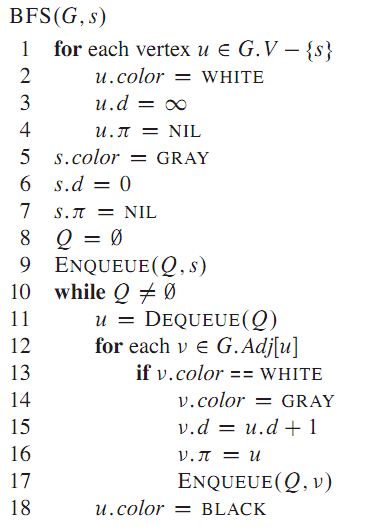



gdzie, 

- `G.V` - zbior wierzcholkow,
- `G.E` - zbior krawędzi,
- `Adj` - `|V|` list, po jednej dla każdego wierzchołka z `V`
- `Adj[u]` - lista wszystkich wierzchołków `v` do których da się przejść z wierzchołka `u`, 
- `s` - wierzchołek początkowy,
- `u.color` - kolor wierzchołka,
- `u.PI` - poprzednik `u` (wczesniej odwiedzony wierzchołek),
-  `u.d` - odległość `u` od wierzchołka początkowego `s`,
- `Q` - kolejka typu FIFO, w której pamięta się szare wierzchołki,
- `ENQUEUE` - wstaw do kolejki,
-  `DEQUEUE` - usun z kolejki.








<u>Przykład działania:</u>

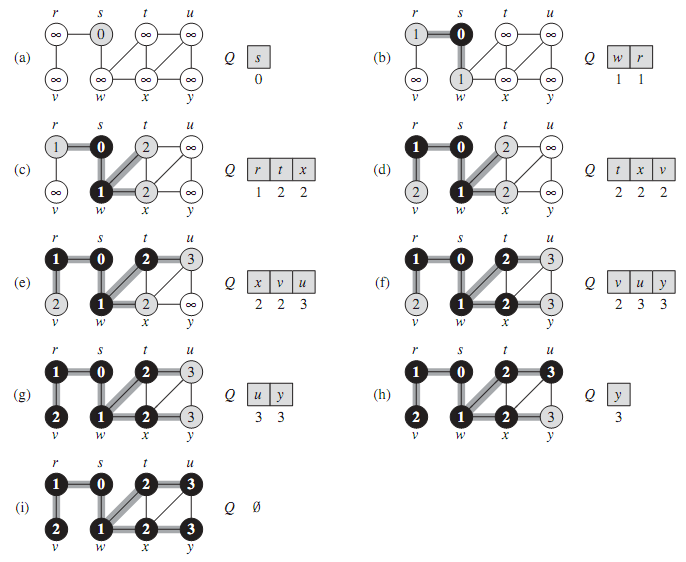

In [122]:
import math
from collections import deque

def BFS(graph, start):
    for vertex in graph.vertices:
        if (vertex == start):
            continue
        vertex.color = 'white'
        vertex.distance = math.inf
        vertex.parent = None
    start.color = 'gray'
    start.distance = 0
    start.parent = None
    queue = deque([start])
    graph.draw()
    while len(queue) > 0:
        vertex = queue.popleft()
        for vertex_name in vertex.edges:
            _vertex = graph[vertex_name]
            if _vertex.color == 'white':
                _vertex.color = 'gray'
                _vertex.distance = vertex.distance + 1
                _vertex.parent = vertex
                queue.append(_vertex)
        vertex.color = 'black'
        graph.draw()

### Zadanie 3

Przedstaw graficznie za pomocą biblioteki networkx (https://networkx.github.io/) kroki działania algorytmu BFS (malowanie wierzchołków).

Instalacja: `pip install networkx` lub `conda install networkx`.

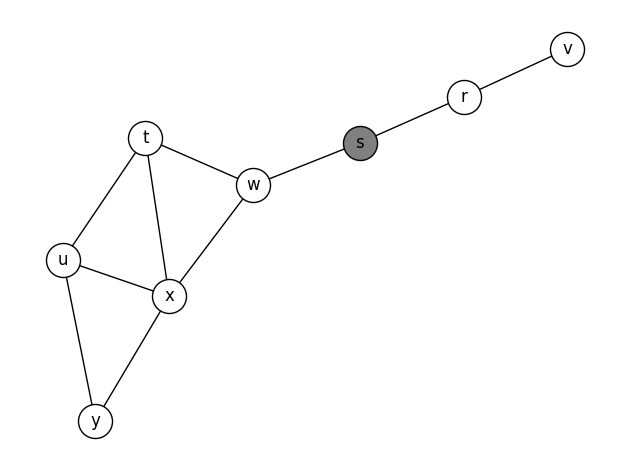

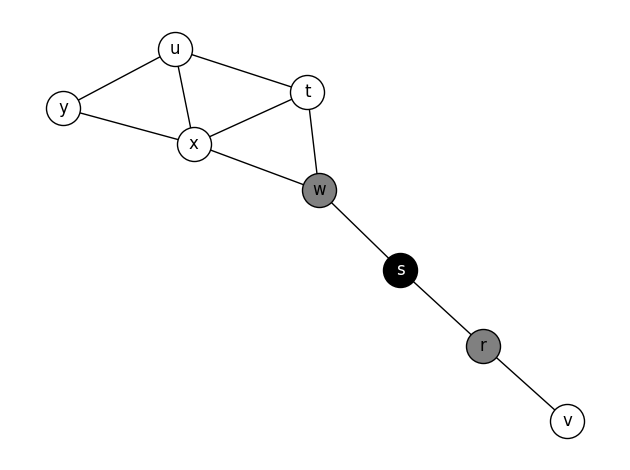

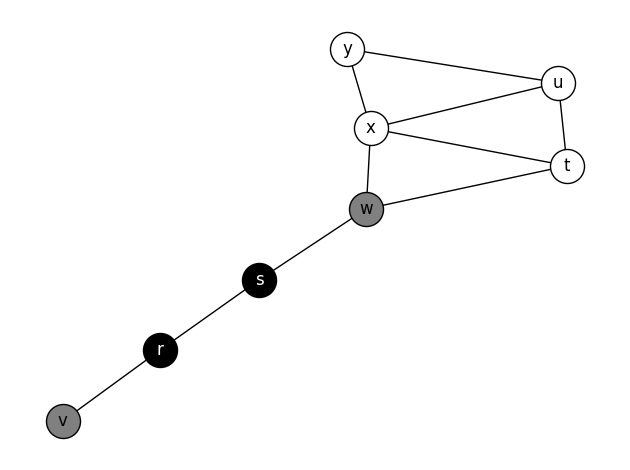

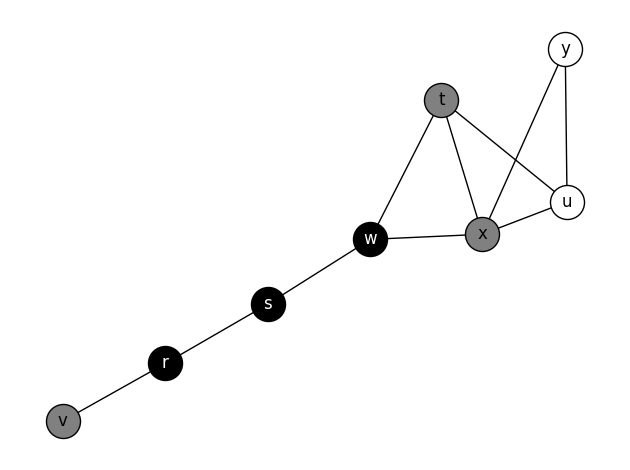

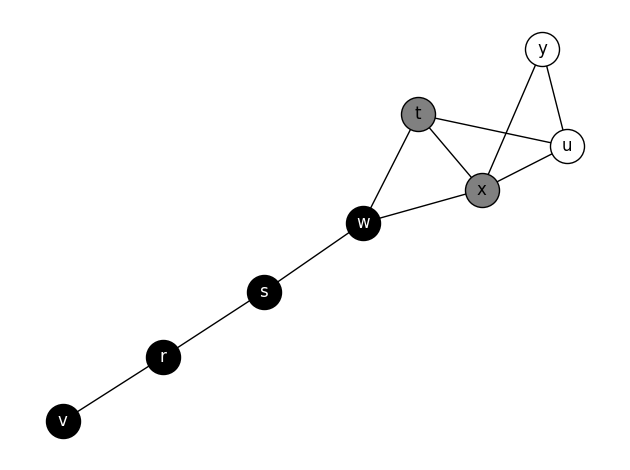

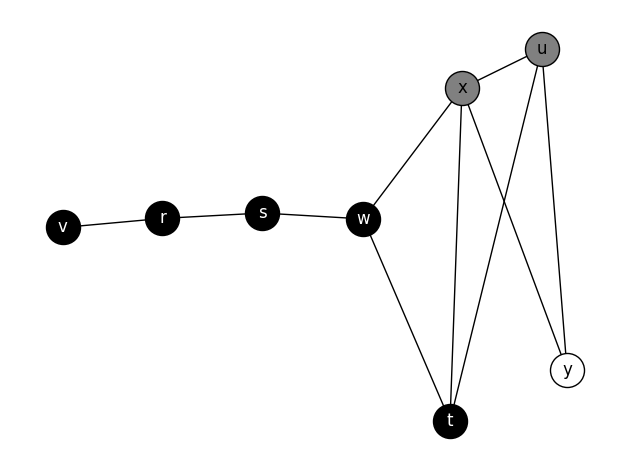

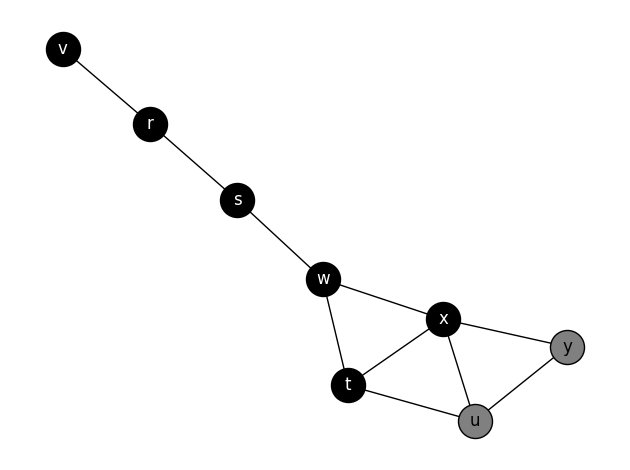

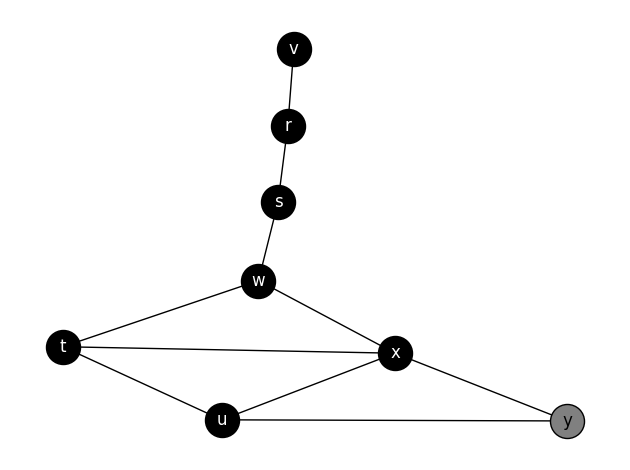

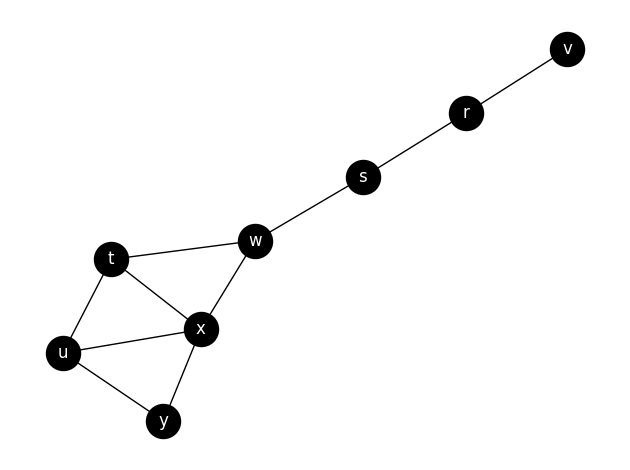

In [123]:
BFS(graph, graph['s'])

### Zadanie 4
Napisz i wykonaj kilka testów jednostkowych (`import unittest`; dokumentacja: 
https://docs.python.org/3/library/unittest.html)

In [124]:
import unittest

def one_sentence_with_stars(s):
    return s.replace(' ', '*')

def two_sentence_with_stars2(s):
    return ' '.join(s.split()).replace(' ', '*')

def four_count_unique_digits(n):
    return len(set(int(digit) for digit in str(n)))

class TestLab2Methods(unittest.TestCase):
    def test_one_sentence_with_stars(self):
        self.assertEqual(one_sentence_with_stars('Sentence_with_underscores'), 'Sentence_with_underscores')
        self.assertEqual(one_sentence_with_stars('A  normal sentence.'), 'A**normal*sentence.')
        with self.assertRaises(AttributeError):
            one_sentence_with_stars(123)
    
    def test_two_sentence_with_stars2(self):
        self.assertEqual(two_sentence_with_stars2('Sentence_with_underscores'), 'Sentence_with_underscores')
        self.assertEqual(two_sentence_with_stars2('A        normal sentence.'), 'A*normal*sentence.')
        with self.assertRaises(AttributeError):
            two_sentence_with_stars2(123)

    def test_four_count_unique_digits(self):
        self.assertEqual(four_count_unique_digits(123), 3)
        self.assertEqual(four_count_unique_digits(123123123), 3)
        self.assertEqual(four_count_unique_digits(111111122222), 2)
        with self.assertRaises(ValueError):
            four_count_unique_digits('abc')

# >>>> TUTAJ DROBNA ZMIANA W STOSUNKU DO DOKUMENTACJI (dla notebooka)
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

........
----------------------------------------------------------------------
Ran 8 tests in 0.005s

OK


### Zadanie 5

Dana jest kwadratowa plansza o boku SIZE (np. 4) dla znanej gry 2048 (https://2048game.com/pl/). Każdy wiersz zawiera od 0 do 4 liczb. Należy, z wykorzystaniem konstrukcji Numpy, zasymulować ruch w lewo, w prawo, w górę i w dół planszy zgodnie z regułami gry (ale BEZ dodawania nowego kafelka w losowym miejscu). Innymi słowy, trzeba napisać cztery funkcje: `move_left(...)`, `move_right(...)`, `move_up(...)`, `move_down(...)`. Przykład ruchu w prawo:

Wejściem i wyjściem każdej z obu funkcji jest 2-wymiarowa tablica Numpy.

> UWAGA: postaraj się napisać „konkretny kod” tylko do jednej z tych funkcji, a pozostałe trzy niech się do niej w sprytny sposób odwołują.


In [26]:
import numpy as np

board = np.array([[4, 4, 4, 4],
                  [4, 4, 4, 4],
                  [4, 0, 0, 4],
                  [4, 4, 4, 4]])

def squish(board):
    for column in range(board.shape[1]):
        for row in range(board.shape[0] - 1, 0, -1):
            if (board[row][column] == board[row - 1][column]):
                board[row][column] += board[row - 1][column]
                board[row - 1][column] = 0

def gravity(board):
    for column in range(board.shape[1]):
        for row in range(board.shape[0] - 1, -1, -1):
            if (board[row][column] != 0):
                for bottom in range(row, board.shape[0]):
                    if (board[bottom][column] == 0):
                        board[bottom][column] = board[bottom - 1][column]
                        board[bottom - 1][column] = 0

def move_down(board):
    new_board = np.copy(board)
    gravity(new_board)
    squish(new_board)
    gravity(new_board)
    return new_board

def move_up(board):
    new_board = np.copy(board)
    new_board = np.flip(new_board, 0)
    new_board = move_down(new_board)
    new_board = np.flip(new_board, 0)
    return new_board

def move_left(board):
    new_board = np.copy(board)
    new_board = np.rot90(new_board)
    new_board = move_down(new_board)
    new_board = np.rot90(new_board, 3)
    return new_board

def move_right(board):
    new_board = np.copy(board)
    new_board = np.rot90(new_board, 3)
    new_board = move_down(new_board)
    new_board = np.rot90(new_board)
    return new_board

print(board)
print()
print('move down')
print()
board = move_left(board)
print(board)
print()
print('move right')
print()
board = move_right(board)
print(board)
print()
print('move up')
print()
board = move_up(board)
print(board)
print()
print('move left')
print()
board = move_left(board)
print(board)

[[4 4 4 4]
 [4 4 4 4]
 [4 0 0 4]
 [4 4 4 4]]

move down

[[8 8 0 0]
 [8 8 0 0]
 [8 0 0 0]
 [8 8 0 0]]


### Zadanie 6

* Zaimplementuj dekorator o nazwie nonNone, który sprawdza czy parametry udekorowanej nim funkcji nie zawierają wartości `None` – jeśli tak, to rzuć wyjątek.

* Dekorator ten powinien posiadać parametr o nazwie `positions`, który ma być typu `Iterable` i zawierać indeksy argumentów dekorowanej funkcji, które podlegają sprawdzeniu (pod kątem `None`).
Czyli jeśli np. przekażemy `positions = []`, to **żaden** parametr dekorowanej funkcji nie zostanie sprawdzony. Jeśli `positions = (2, 1)`, to tylko parametry trzeci i drugi zostaną sprawdzone. Itp.
Wreszcie, jeśli użyjemy dekoratora w ten sposób: `@nonNone()`, wtedy wszystkie parametry dekorowanej funkcji mają zostać sprawdzone.

* Napisz pięć testów jednostkowych (dla przypadków poprawnych lub takich,
które rzucają wyjątek).

> O dekoratorach z parametrami:
https://stackoverflow.com/questions/5929107/decorators-with-parameters

In [126]:
def nonNone(argument = None):
    def decorator(function):
        def wrapper(*args, **kwargs):
            for index, arg in enumerate(args):
                if ((argument is None or index in argument) and arg is None):
                    raise ValueError(f'argument {index} is None')
            return function(*args, **kwargs)
        return wrapper
    return decorator

@nonNone()
def function_one(argument_one, argument_two):
    pass

@nonNone((1, 2))
def function_two(argument_one, argument_two, argument_three):
    pass

@nonNone([0])
def function_three(argument_one):
    pass

class TestMethods(unittest.TestCase):
    def test_function_one_pass(self):
        function_one(1, 2)
        pass

    def test_function_one_fail(self):
        with self.assertRaises(ValueError):
            function_one(1, None)
    
    def test_function_two_pass(self):
        function_two(None, 2, 3)
        pass

    def test_function_two_fail(self):
        with self.assertRaises(ValueError):
            function_two(1, None, 3)

    def test_function_three_pass(self):
        function_three(0)
        pass

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

........
----------------------------------------------------------------------
Ran 8 tests in 0.004s

OK
